# L'autoapprentissage

Plusieurs cas d'espèces en sciences et génies peuvent être approchés en liant un variable avec une ou plusieurs autres à l'aide de régressions linéaires, polynomiales, sinusoïdales, exponentielle, sigmoïdales, [etc](https://dl.sciencesocieties.org/publications/aj/pdfs/107/2/786). Encore faut-il s'assurer que ces formes préétablies représentent le phénomène de manière fiable.

Lorsque la forme de la réponse est difficile à envisager, en particulier dans des cas non-linéaires ou impliquant plusieurs variables, on pourra faire appel à des modèles dont la structure n'est pas contrôlée par une équation rigide gouvernée par des paramètres (comme la pente ou l'intercept).

L'**autoapprentissage**, apprentissage automatique, ou *machine learning*, vise à détecter des structures complexes émergeant d'ensembles de données à l'aide des mathématiques et de processus automatisés afin de prédire l'émergence de futures occurrences. Comme ensemble de techniques empiriques, l'autoapprentissage est un cas particulier de l'**intelligence artificielle**, qui elle inclu aussi les mécanismes déterministes et des ensembles d'opérations logiques. Par exemple, les premiers ordinateurs à compétitionner aux échecs se basaient sur des règles de logique (si la reine noire est positionnée en c3 et qu'un le fou blanc est en position f6 et que ... alors bouge la tour en g5 - j'écris n'importe quoi). Il s'agissait d'intelligence artificielle, mais pas d'autoapprentissage. L'autoapprentissage passera davantage par la simulation de nombreuses parties et dégagera la structure optimale pour l'emporter considérant les positions des pièces sur l'échiquier.

## Objectifs

* Comprendre les applications possibles de l'autoapprentissage
* Comprendre le flux de travail d'une opération d'autoapprentissage
* Comprendre les principes soutenant les techniques des *k* plus proches voisins, des arbres décisionnels, des réseaux neuronnaux et des processus gaussiens.

Plus spécifiquement, vous devrez à la fin de cette section être en mesure de prédire une variable catégorie ou numérique à partir de données observées.

## Lexique
L'autoapprentissage possède son jargon particulier. Puisque certains termes peuvent porter à confusion, voici quelques définitions de termes que j'utiliserai dans ce chapitre.

- **Réponse**. La variable que l'on cherche à obtenir. Il peut s'agir d'une variable continue comme d'une variable catégorielle. On la nomme aussi la *cible*.
- **Prédicteur**. Une variable utilisée pour prédire une réponse. Les prédicteurs sont des variables continues. Les prédicteurs de type catégoriel doivent préalablement être dummifiés (voir chapitre 5). On nomme les prédicteurs les *entrées*.
- **Apprentissage supervisé** et **non-spervisé**. Si vous avez suivi le cours jusqu'ici, vous avez déjà utilisé des outils entrant dans la grande famille de l'apprentissage automatique. La régression linéaire, par exemple, vise à minimiser l'erreur sur la réponse en optimisant les coefficients de pente et l'intercept. Un apprentissage supervisé a une cible, comme c'est le cas de la régression linéaire. En revanche, un apprentissage non supervisé n'en a pas: on laisse l'algorithme le soin de détecter des structures intéressantes. Nous avons déjà utilisé cette approche. Pensez-y un peu... l'analyse en composante principale ou en coordonnées principales, ainsi que le partitionnement hiérarchique ou non sont des exemples d'apprentissage non supervisé. En revanche, l'analyse de redondance a une réponse. L'analyse discriminante aussi, bien que sa réponse soit catégorielle. L'apprentissage non supervisé ayant déjà été couvert au chapitre 7, ce chapitre ne s'intéresse qu'à l'apprentissage supervisé.
- **Régression** et **Classification**. Alors que la régression est un type d'apprentissage automatique pour les réponses continues, la classification vise à prédire une réponse catégorielle. Il existe des algorithmes uniquement application à la régression, uniquement applicables à la classification, et plusieurs autres adaptable aux deux situations.
- **Données d'entraînement** et **données de test**. Lorsque l'on génère un modèle, on désire qu'il sache comment réagir à ses prédicteurs. Cela se fait avec des données d'entraînement, sur lesquelles on **calibre** et **valide** le modèle. Les données de test servent à vérifier si le modèle est en mesure de prédire des réponses sur lesquelles il n'a pas été entraîné.
- **Fonction de perte**. Une fonction qui mesure l'erreur d'un modèle.


## Démarche

La première tâche est d'explorer les données, ce que nous avons couvert au chapitres 3 et 4.

### Prétraitement
Pour la plupart des techniques d'autoapprentissage, le choix de l'échelle de mesure est déterminant sur la modélisation subséquente. Par exemple, un algorithme basé sur la distance comme les *k* plus proches voisins ne mesurera pas les mêmes distances entre deux observations si l'on change l'unité de mesure d'une variable du mètre au kilomètre. Il est donc important d'effectuer, ou d'envisager la possibilité d'effectuer un prétraitement sur les données. Je vous réfère au chapitre 6 (en développement) pour plus de détails sur le prétraitement.

### Entraînement et test

Vous connaissez peut-être l'expression sportive "avoir l'avantage du terrain". Il s'agit d'un principe prétendant que els athlètes performent mieux en terrain connu. Idem pour les modèles phénoménologiques. Il est possible qu'un modèle fonctionne très bien sur les données avec lesquelles il a été entraîné, mais très mal sur des données externes. De mauvaises prédictions effectuées à partir d'un modèle qui semblait bien se comporter peut mener à des décisions qui, pourtant prises de manière confiante, se révèlent fallacieuses au point d'aboutir à de graves conséquences. C'est pourquoi, **en mode prédictif, on doit évaluer la précision et la justesse d'un modèle sur des données qui n'ont pas été utilisés dans son entraînement**.

En pratique, il convient de séparer un tableau de données en deux: un tableau d'entraînemnt et un tableau de test. Il n'existe pas de standards sur le ratio à utiliser. Cela dépend de la prudence de l'analyse et de l'ampleur de son tableau de données. Certaines personnes préférerons couper le tableau à 50%. D'autres préférerons réserver le deux-tiers des données pour l'entraînement, ou 70%, 75%. Rarement, réservera-t-on moins plus de 50% et moins de 20% à la phase de test.

Si les données sont peu équilibrées (par exemple, on retrouve peu de données de l'espèce $A$, que l'on retrouve peu de données à un pH inférieur à 5 ou que l'on a peu de données croisées de l'espèce $A$ à ph inférieur à 5), il y a un danger qu'une trop grande part, voire toute les données, se retrouvent dans le tableau d'entraînement (certaines situations ne seront ainsi pas testées) ou dans le tableau de test (certaines situations ne seront pas couvertes par le modèle). L'analyste doit s'assurer de séparer le tableau au hasard, mais de manière consciencieuse.

### Sousapprentissage et surapprentissage

Une dfficulté en modélisation phénoménologique est ce qui tient de la structure et ce qui tient du bruit. Lorsque l'on considère une structure comme du bruit, on est dans un cas de sousapprentissage. Lorsque, au contraire, on interprète du bruit comme une structure, on est en cas de surapprentissage. Les graphiques suivant présentent ces deux cas, avec au centre un cas d'apprentissage conforme.

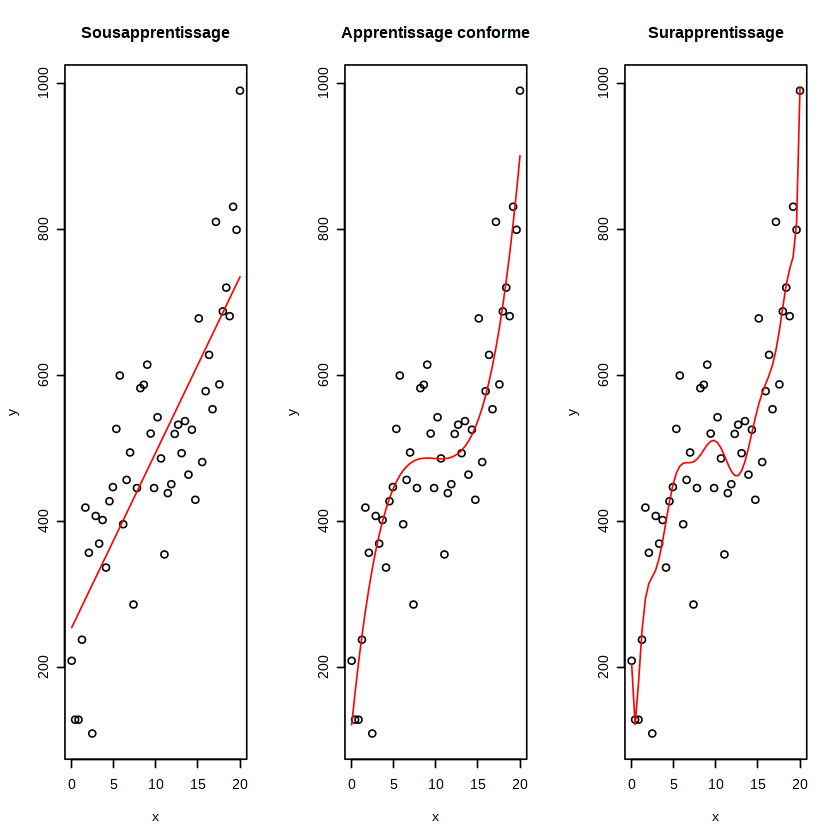

In [53]:
set.seed(633)
n <- 50
x <- seq(0, 20, length = n) 
y <- 500 + 0.4 * (x-10)^3 + rnorm(n, mean=10, sd=80) # le bruit est généré par rnorm()

par(mfrow = c(1, 3))
plot(x, y, main = "Sousapprentissage")
lines(x, predict(lm(y~x)), col = "red")

plot(x, y, main = "Apprentissage conforme")
lines(x, 
      predict(lm(y~x + I(x^2) + I(x^3))),
      col = "red")

plot(x, y, main = "Surapprentissage")
lines(x, 
      predict(lm(y~x + I(x^2) + I(x^3) + I(x^4) + 
                 I(x^5) + I(x^6) + I(x^7) + I(x^8) +
                 I(x^9) + I(x^10) + I(x^11) + I(x^12))),
      col = "red")


Afin d'éviter les cas de *mésapprentissage* on peut avoir recours à la validation croisée.

### Validation croisée

Souvent confondue avec le fait de séparer le tableau en phases d'entraînement et de test, la validation croisée est un principe incluant plusieurs algorithmes qui consiste à **entraîner** le modèle sur un échantillonnage aléatoire des données d'entraînement.

La technique la plus utilisée est le *k-fold*, où l'on sépare aléatoirement le tableau d'entraînement en un nombre $k$ de tableaux. À chaque étape de la validation croisée, on calibre le modèle sur tous les tableaux sauf un, puis on valide le modèle sur le tableau exclu. La performance du modèle en entraînement est jugée sur les validations.

### Choix de l'algorithme d'apprentissage

Face aux centaines d'algoritmhes d'apprentissages qui vous sont offertes, choisir l'algorithme ou les algorithmes adéquats pour vos données n'est pas facile. Ce choix sera motivé par les tenants et aboutissants des algorithmes, votre expérience, l'expérience de la littérature, l'expérience de vos collègues. Une approche raisonnable est de tester plusieurs modèles et d'approfondir si ce n'est déjà fait la mathématique des options retenues. Il existe des algorithmes génétiques, qui ne sont pas couverts ici, permettent de sélectionner des modèles d'autoapprentissages optimaux. Un de ces algorithmes est offert par le module Python [`tpot`](https://epistasislab.github.io/tpot/).

### Déploiement
RData, Shiny

En résumé,

1. Explorer les données
1. Sélectionner des algorithmes
1. Effectuer un prétraitement
1. Créer un ensemble d'entraînement et un ensemble de test
1. Lisser les données sur les données d'entraînement avec validation croisée
1. Tester le modèle
1. Déployer le modèle

## Algorithmes

Il existe des centaines d'algorithmes d'apprentissage. Je n'en couvrirai que quatre, qui me semblent être appropriés pour la modélisation phénoménologique des systèmes vivants, et utilisables pour la régression et la classification.

- Les k plus proches voisins 
- Les réseaux neuronaux
- Les arbres de décision
- Les processus gaussiens

## L'autoapprentissage en `R`

Plusieurs options sont disponibles.

1. Les modules que l'on retrouve en `R` pour l'autoapprentissage sont nombreux, et parfois spécialisés. Il est possible de les utiliser individuellement.
1. Chacun de ces modules fonctionne à sa façon. Le module `caret` de `R` a été conçu pour donner accès à des centaines de fonctions d'autoapprentissage via une interface commune.
1. Le module `mlr` occupe sensiblement le même créneau que `caret`, mais utilise plutôt une approche par objets connectés. Au moment d'écrire ces lignes, `mlr` est peu documenté, donc *a priori* plus complexe à prendre en main.
1. En Python, le module `scikit-learn` offre un interface unique pour l'utilisation de nombreuses techniques d'autoapprentissage. Il est possible d'appeler des fonctions de Python à partir de `R` grâce au module `reticulate`.

Dans ce chapitre, nous verrons comment fonctionnent certains algorithmes sélectionnés, puis nous les appliquerons avec le module respectif qui m'a semblé le plus approprié. Vous remarquerez néanmoins des références récurentes aux modules de Python. En ce moment, la force de `R` réside dans la gestion des tableaux, les tests statistiques, l'exploration heuristique et la visualisation de données. Néanmoins, Python le surpasse pour l'autoapprentissage...

In [2]:
library("tidyverse") # évidemment
library("caret")

ERROR: Error: package or namespace load failed for 'tidyverse' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'lattice'


## Les *k* plus proches voisins

> [![Les voisins, une pièce de Claude Meunier here](https://i.ytimg.com/vi/-RpYi_Vuviw/hqdefault.jpg)](https://youtu.be/-RpYi_Vuviw?t=6m40s)

> "Le... l'idée en arrière pour être... euh... simpliste, là c'est que c'est un peu de... euhmm... de la vitamine de vinyle." - Geroges (Les voisins, une pièce de Claude Meunier)

Pour dire comme Georges, le... l'idée en arrière des KNN pour être... euh... *simpliste*, c'est que un objet va ressembler à ce qui se trouve dans son voisinage. Les KNN se basent en effet sur une métrique de distance pour rechercher un nombre $k$ de points situés à proximité de la mesure. Les $k$ points les plus proches sont retenus, $k$ étant un entier non nul à optimiser. Un autre paramètre parfois utilisé est la distance maximale des voisins à considérer: un voisin trop éloigné pourra être discarté. La réponse attribuée à la mesure est calculée à partir de la réponse des $k$ voisins retenus. Dans le cas d'une régression, on utiliser généralement la moyenne. Dans le cas de la classification, la mesure prendra la catégorie qui sera la plus présente chez les $k$ plus proches voisins.

L'algorithme des *k* plus proches voisins est relativement simple à comprendre. Certains pièges sont, de même, peuvent être contournés facilement. Imaginez que vous rechercher les points les plus rapprochés dans un système de coordonnées géographiques où les coordonnées $x$ sont exprimées en mètres et les coodonnées $y$, en centimètres. Vous y projetez trois points.

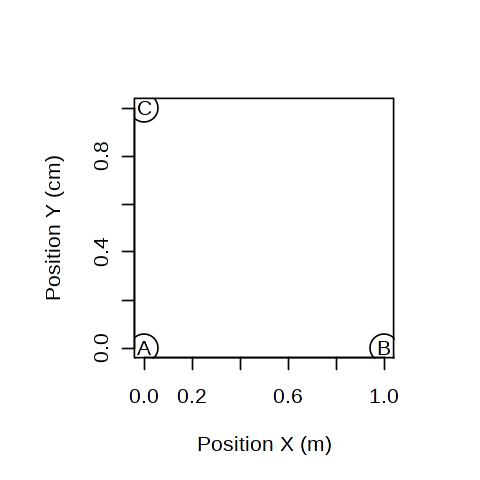

In [55]:
data <- data.frame(X = c(0, 1, 0),
                   Y = c(0, 0, 1),
                   row.names = c('A', 'B', 'C'))
options(repr.plot.width = 4, repr.plot.height = 4)
par(pty="s")
plot(data, cex=3,
     xlab = 'Position X (m)', ylab = 'Position Y (cm)')
text(data, labels = rownames(data))

Techniquement la distance A-B est 100 plus élevée que la distance A-C, mais l'algorithme ne se soucie pas de la métrique que vous utilisez. Il est promordial dans ce cas d'utiliser la même métrique. Cette stratégie est évidente lorsque les variables sont comparables. C'est rarement le cas, que ce soit lorsque l'on compare des dimensions physionomiques (la longueur d'une phalange ou celle d'un fémur) mais lorsque les variables incluent des mélanges de longueurs, des pH, des décomptes, etc., il est important de bien identifier la métrique et le type de distance qu'il convient le mieux d'utiliser. En outre, la standardisation des données à une moyenne de zéro et àun écart-type de 1 est une approche courrament utilisée.

### Exemple d'application

Pour ce premier exemple, je présenterai un cheminement d'autoapprentissage, du prétraitement au test.

In [56]:
# ionome...

## Les arbres décisionnels

![Les Ents, tiré du film le Seigneur des anneaux](https://bloomerang.co/wp-content/uploads/2017/02/Entmoot.jpg)

Un arbre décisionnel est une collection hiérarchisée de décisions, le plus souvent binaires. Chaque embranchement est un test à vrai ou faux sur une variable. La réponse, que ce soit une catégorie ou une valeur numérique, se trouve au bout de la dernière branche. Les suites de décisions sont organisées de manière à ce que la précision de la réponse soit optimisée.

Par exemple, ...

### Les forêts aléatoires

Les *random forests* fonctionnent selon le principe des arbres décisionnels. Mais au lieu d'un seul arbre, on génère aléatoirement un grand nombre d'arbre sur des données assujetties à du *bootstrap* et on crée un arbre décisionnel pour chacun de ces tableau issus du *bootstrap*.

> Des ganses de bottes? Le *bootstrap* consiste en une famille de techniques qui permettent de générer de nouvelles données en échantillonnant les données **avec remplacement** (il est possible de retrouver plusieurs fois la même observation originale dans un nouveau tableau généré avec du *bootstrap*). On obtient ainsi de nouvelles données *que l'on aurait pu obtenir*, sur lesquelles ont peut pratiquer toutes sortes de tests. Pourquoi parle-t-on de ganses de bottes? C'est de l'ironie sauce 1860: parce que c'est comme passer par-dessus une clôture en tirant sur les ganses de ses propres bottes, tout comme le Baron de Munchausen (personnage de fiction comique) a réussi a se désempêtrer d'un marais (avec son cheval) en tirant sur sa propre couette.

<img src="http://photos.wikimapia.org/p/00/06/37/62/10_1280.jpg" alt="Munchausen" width="400px"/>
Source: Sculpture du Baron de Munchausen de Andrey Orlov - Moscou, Wikipapia

Le résultat prédit avec des forêts aléatoires est la moyenne des résultats prédits par chacun des arbres générés à partir des données d'entraînement.

Les forêts aléatoires constituent des algorithmes adaptés à toutes sortes de situations.

Par exemple...

# Les réseaux neuronaux

Après les KNN et les random forests, nous passons au domaine plus complexe des réseaux neuronnaux. Il en existe plusieurs formes, dont la plus simple manifestation est le *perceptron multicouche*. Le terme *réseau neuronal* est une métaphore liée à une perception que l'on avait du fonctionnement du cerveau humain lorsque la technique des réseaux neuronnaux a été développée dans les années 1950. Un réseau neuronnal comprend une série de boîtes d'entrées liée à des fonctions qui transforment et acheminent successivement l'information jusqu'à la sortie d'une ou plusieurs réponse. Dans l'exemple suivant, on retrouve 4 variables d'entrée et trois variables de sortie entre lesquelles on retrouve 5 couches dont le nombre de neuronnes varient entre 3 et 6.

![](images/deep_neural_network.png)

Source: [Neural designer](https://www.neuraldesigner.com/)

Entre la première couche de neuronnes (les variables prédictives) et la dernière couche (les variables réponse), on retrouve des *couches cachées*. Chaque neuronne est relié à tous les neuronnes de la couche suivante.

Les liens sont des poids, qui peuvent prendre des valeurs dans l'ensemble des nombres réels. À chaque neuronne suivant la première couche, on fait la somme des poids multipliés par la sortie du neuronne. Le nombre obtenu entre dans chaque neuronne de la couche. Le neuronne est une fonction, souvent très simple, qui transforme le nombre. La fonction plus utilisée est probablement la fonction ReLU, pour *rectified linear unit*, qui expulse le même nombre aux neuronnes de la prochaine couche s'il est positif: sinon, il expulse un zéro.

**Exercice**. Si tous les neuronnes sont des fonctions ReLU, calculez la sortie de ce petit réseau neuronal.

<img src="images/nn_ex1_Q.jpg" width="600px">

Vous trouverez la réponse en changeant la cellule suivante du type `Raw` au type `Markdown`.

Il est aussi possible d'ajouter un *biais* à chaque neuronne, qui est un nombre réel additionné à la somme des neuronnes pondérée par les poids.

L'optimisation les poids pour chaque lien et les biais pour chaque neuronne (grâce à des algorithmes dont le fonctionnement sort du cadre de ce cours) constitue le processus d'apprentissage. Avec l'aide de logiciels et de modules spécialisés, la construction de réseaux de centaines de neuronnes organisés en centaines de couches vous permettra de capter des patrons complexes dans des ensembles de données.

Vous avez peut-être déjà entendu parler d'apprentissage profond (ou *deep learning*). Il s'agit simplement d'une appellation des réseaux neuronnaux modernisé pour insister sur la présence de plusieurs couches de neuronnes. C'est un terme à la mode.

### L'apprentissage profond sur `R` avec Keras

Plusieurs modules sont disponibles sur `R` pour l'apprentissage profond. Certains utilisent le module [H2O.ia](https://github.com/h2oai/h2o-3), d'autres utilisent plutôt [Keras](https://keras.rstudio.com/). La raison pour laquelle nous utiliseront ce dernier est d'abord qu'il m'est plus familier, et ensuite parce que Keras supporte les réseaux neuronnaux classiques (perceptrons multicouche) autant que circonvutionnels ou récurents.

Pour **installer Keras**, installez d'abord [Anaconda](anaconda.com/downloads) si ne n'est pas déjà fait. Lancez Anaconda navigator (sur Windows, via le menu - sur Linux, en tapant la commande `anaconda-navigator`). Dans l'onglet *Environments* créez un environnement Python: nous le nommerons `r-tensorflow`. Le gestionnaire de modules vous permettra d'installer `keras`.

### Exemple d'application

$$ y^2 = 4$$

### Pour aller plus loin

En une heure divisée en [4 vidéos](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi), Grant Sanderson explique les réseaux neuronaux de mainère intuitive. En ce qui a trait à Keras, je recommande le livre [Deep learning with R, de François Allaire](https://www.safaribooksonline.com/library/view/deep-learning-with/9781617295546/?ar), auquel vous avez accès avec un IDUL de l'Université Laval. Si vous vous sentez à l'aise à utiliser Keras avec le langage Python, je vous recommande le cours gratuit en ligne [*Applications of deep neural networks*, de Jeff Heaton](https://www.youtube.com/watch?v=sRy26qWejOI&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN).

Des types de réseaux neuronnaux spécialisés ont été développés. Je les présente sans aller dans les détails.

- **Réseaux neuronnaux convolutif**. Ce type de réseau neuronal est surtout utilisé en reconnaissance d'image. Les couches de neurones convolutifs possèdent, en plus des fonctions des perceptrons classiques, des filtres permettant d'intégrer les variables descriptives connexes à l'observation: dans le cas d'une image, il s'agit de scanner les pixels au pourtour du pixel traité. [Une brève introduction sur Youtube](https://www.youtube.com/watch?v=YRhxdVk_sIs).
- **Réseaux neuronnaux récurents**. Prédire des occurences futures à partir de séries temporelles implique que la réponse au temps t dépend non seulement de conditions externes, mais aussi le la réponse au temps t-1. Les réseaux neuronnaux récurents. Vous devrez ajouter des neuronnes particuliers pour cette tâche, qui pourra être pris en charge par Keras grâce aux couches de type [*Long Short-Term Memory network*, ou LSTM](https://www.youtube.com/watch?v=UnclHXZszpw).
- **Réseaux neuronnaux probabilistes**. Les réseaux neuronnaux non-probabilistes offre une estimation de la variable réponse. Mais quelle est la crédibilité de la réponse selon les variables descriptives? Question qui pourrait se révéler crutiale en médecine ou en ingénierie, à la laquelle on pourra répondre en mode probabiliste. Pour ce faire, on pose des distributions *a priori* sur les poids du réseau neuronal. Le module [`edward`](http://edwardlib.org/), programmé et distribué en Python, offre cette possibilité. Vous pourrez accéder à `edward` grâce au module `reticulate`, mais à ce stade mieux vaudra basculer en Python. Pour en savoir davantage, considérez [cette conférence de Andrew Rowan](https://www.youtube.com/watch?v=I09QVNrUS3Q).

# Les processus gaussiens

Les sorties des techniques que sont les KNN, les arbres ou les forêts ainsi que les réseaux neuronaux sont (classiquement) des nombres réels ou des catégories. Dans les cas où la crédibilité de la réponse est importante, il devient pertinent que la sortie soit probabiliste: les prédictions seront alors présentées sous forme de distributions de probabilité. Dans le cas d’une classification, la sortie du modèle sera un vecteur de probabilité qu’une observation appartienne à une classe ou à une autre. Dans celui d’une régression, on obtiendra une distribution continue.

Les **processus gaussiens** tirent profit des statistiques bayésiennes pour effectuer des prédictions probabilistes. D’autres techniques peuvent être utilisées pour effectuer des prédictions probabilistes, comme les [réseaux neuronaux probabilistes](http://edwardlib.org/iclr2017), que j'ai intruduits précédemment.

Bien que les processus gaussiens peuvent être utilisés pour la classification, son fonctionnement s'explique favorablement, de manière intuitive, pas la régression.

## Un approche intuitive

Ayant acquis de l'expérience en enseignement des processus gaussiens, [John Cunningham](http://stat.columbia.edu/~cunningham/) a développé une approche intuitive permettant de saisir les mécanismes des processus gaussiens. lors de conférences disponible sur YouTube ([1](https://youtu.be/BS4Wd5rwNwE), [2](https://www.youtube.com/watch?v=Jv25sg-IYHU)), il aborde le sujet par la nécessité d'effectuer une régression non-linéaire.

Générons d'abord une variable prédictive `x`, l'heure, et une variable réponse `y`, le rythme cardiaque d'un individu en battements par minute (bpm).

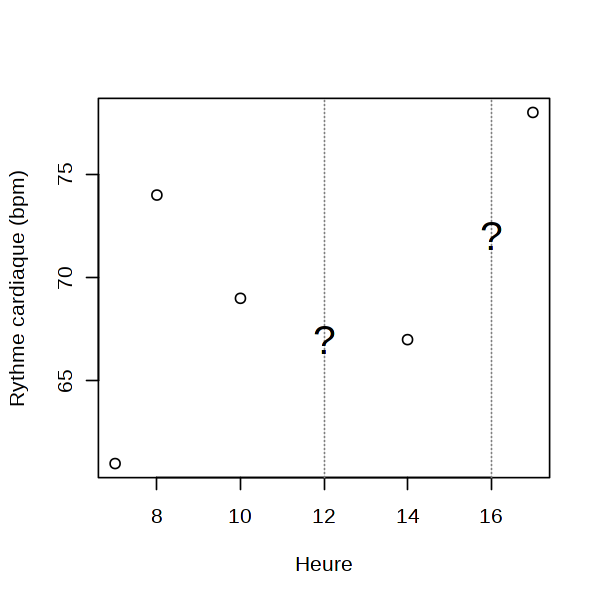

In [1]:
x <- c(7, 8, 10, 14, 17)
y <- c(61, 74, 69, 67, 78)

options(repr.plot.width = 5, repr.plot.height = 5)
plot(x, y, xlab="Heure", ylab="Rythme cardiaque (bpm)")
abline(v=12, lty=3, col='gray50');text(12, 67, '?', cex=2) # 🤔
abline(v=16, lty=3, col='gray50');text(16, 72, '?', cex=2) # 🤔

Poser un problème par un processus gaussien, c'est se demander les valeurs crédibles qui pourraient être obtenues hors du domaine d'observations (par exemple, dans la figure ci-dessus, à `x=12` et `x=16`)? Ou bien, de manière plus générale, *quelles fonctions ont pu générer les variables réponse à partir d'une structure dans les variables prédictrices?*

Les distributions normales, que nous appellerons *gaussiennes* dans cette section par concordance avec le terme *processus gaussien*, sont particulièrement utiles pour répondre à cette question.

Nous avons vu précédemment ce que sont les distributions de probabilité: des outils mathématiques permettant d'appréhender la structure des processus aléatoires. Une distribution gaussienne représente une situation où l'on tire au hasard des valeurs continues. Une distribution gaussienne de la variable aléatoire $X$ de moyenne $0$ et de variance de $1$ est notée ainsi:

$$ X \sim \mathcal{N} \left( 0, 1\right)$$

Par exemple, une courbe de distribution gaussienne du rythme cardiaque à 7:00 pourrait prendre la forme suivante.

$$ bpm \sim \mathcal{N} \left( 65, 5\right)$$

En `R`:

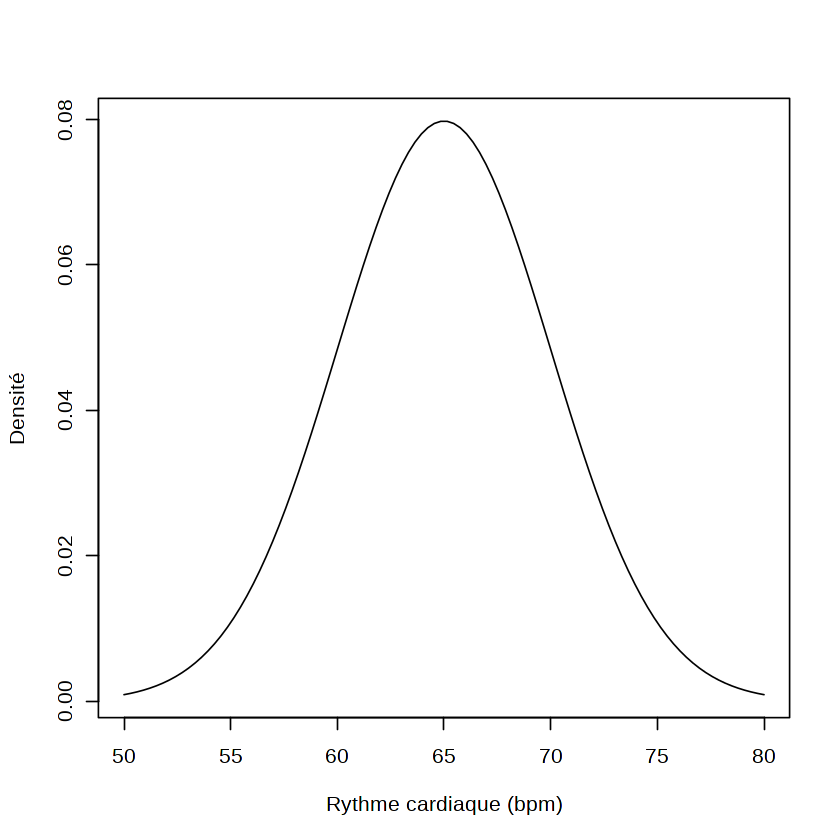

In [1]:
x_sequence <- seq(50, 80, length=100)
plot(x_sequence,
     dnorm(x_sequence, mean=65, sd=5),
     type="l",
    xlab="Rythme cardiaque (bpm)",
    ylab="Densité")

Une distribution **bi**normale, un cas particulier de la distribution **multi**normale, comprendra deux vecteurs, $x_1$ et $x_2$. Elle aura donc deux moyennes. Puisqu'il s'agit d'une distribution biormale, et non pas deux distributions normales, les deux variables ne sont pas indépendantes et l'on utilisera une matrice de coraviance au lieu de deux variances indépendantes.

$$
\binom{x_1}{x_2} \sim \mathcal{N}
\Bigg( 
\binom{\mu_1}{\mu_2},
\left[ {\begin{array}{cc}
\Sigma_{x_1} & \Sigma_{x_1,x_2} \\
\Sigma_{x_1,x_2}^T & \Sigma_{x_2} \\
\end{array} } \right]
\Bigg)
$$

La matrice $\Sigma$, dite de *variance-covariance*, indique sur sa diagonale les variances des variables ($\Sigma_{x_1}$ et $\Sigma_{x_2}$). Les covariances $\Sigma_{x_1,x_2}$ et $\Sigma_{x_1,x_2}^T$ sont symétriques et indiquent le lien entre les variables.

On pourrait supposer que le rythme cardiaque à 8:00 soit corrélé avec celui à 7:00. Mises ensembles, les distriutions gaussiennes à 7:00 et à 8:00 formeraient une distribution gaussienne binormale.

$$
\binom{bpm_7}{bpm_8} \sim \mathcal{N}
\Bigg( 
\binom{65}{75},
\left[ {\begin{array}{cc}
10 & 6 \\
6 & 15 \\
\end{array} } \right]
\Bigg)
$$

En `R`:


Attaching package: ‘ellipse’

The following object is masked from ‘package:graphics’:

    pairs



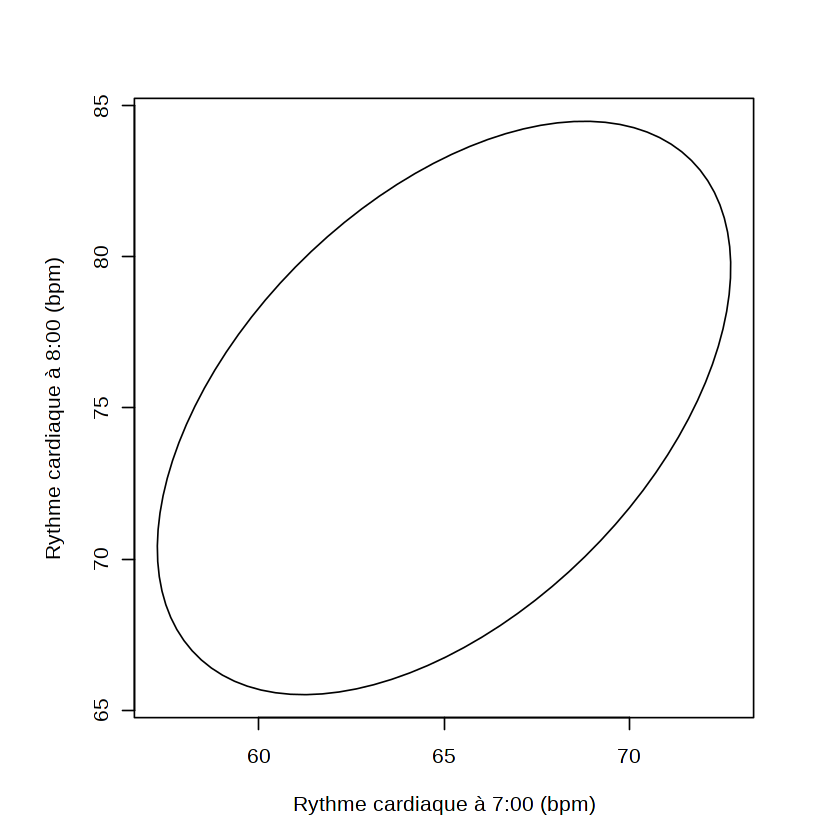

In [2]:
library("ellipse")
means_vec <- c(65, 75)
covariance_mat <- matrix(c(10, 6, 6, 15), ncol=2)
par(pty='s')
plot(ellipse(x=covariance_mat, centre=means_vec, levels=0.95), 
     type='l',
     xlab="Rythme cardiaque à 7:00 (bpm)",
     ylab="Rythme cardiaque à 8:00 (bpm)")
#lines(ellipse(x=covariance_mat, centre=means_vec, level=0.8))

On peut se poser la question: étant donnée que $x_1 = 68$, quelle serait la distribution de $x_2$? Dans ce cas bivariée, la distribution marginale serait univariée, mais dans le cas multivarié en $D$ dimensions, la distribution marginale où l'on spécifie $m$ variables serait de $D-m$. de  Une propriété fondamentale d'une distribution gaussienne est que peu importe l'endroit où l'angle selon lequel on la tranche, la distribution marginale sera aussi gaussienne. Lorsque l'on retranche une ou plusieurs variables en spécifiant la valeur qu'elles prennent, on applique un *conditionnement* à la distribution.

Loading required package: mvtnorm


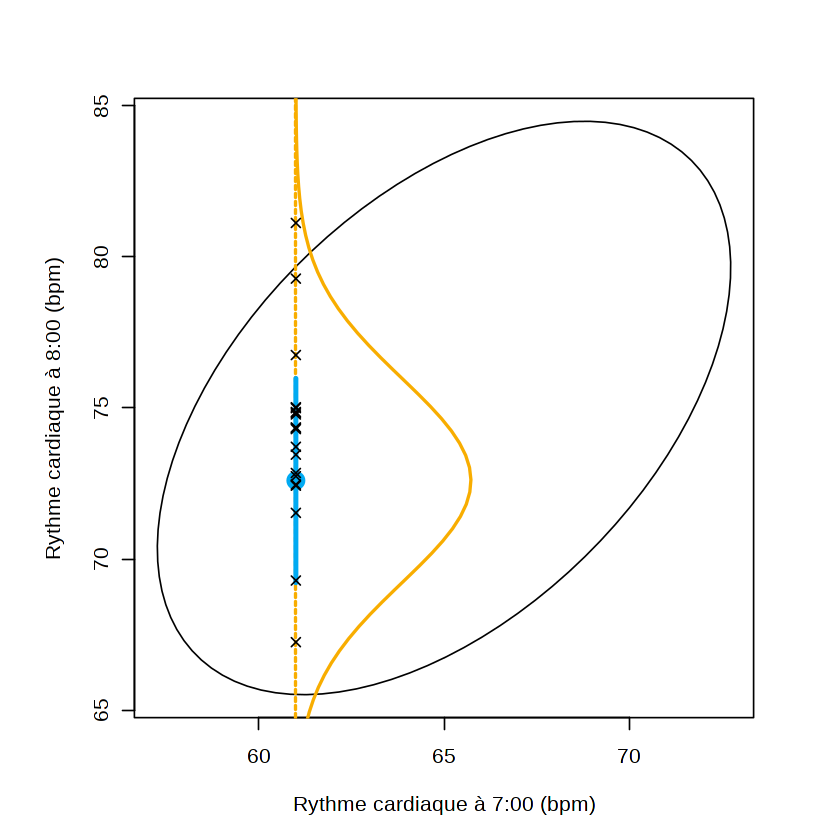

In [3]:
library("condMVNorm")

condition_x1 <- 61 # changer ce chiffre pour visualiser l'effet

cond_parameters <- condMVN(mean=means_vec, sigma=covariance_mat,
                           dependent=2, given=1, X.given=condition_x1)
cond_mean <- cond_parameters$condMean
cond_sd <- sqrt(cond_parameters$condVar)
x2_sequence <- seq(50, 90, length=100)
x2_dens <- dnorm(x2_sequence, mean=cond_mean, sd=cond_sd)

par(pty='s')
plot(ellipse(x=covariance_mat, centre=means_vec, levels=0.95), type='l',
     xlab="Rythme cardiaque à 7:00 (bpm)",
     ylab="Rythme cardiaque à 8:00 (bpm)")
abline(v=condition_x1, col='#f8ad00', lwd=2, lty=2)
lines(x=condition_x1 + x2_dens*40, y=x2_sequence, col="#f8ad00", lwd=2)
lines(x = c(condition_x1, condition_x1),
      y = c(cond_mean-cond_sd, cond_mean+cond_sd),
     lwd=3, col='#00aaf2')
points(condition_x1, cond_mean, 
       col='#00aaf2', pch=16, cex=2)

n_sample <- 20
points(x = rep(condition_x1, n_sample),
      y = rnorm(n_sample, cond_mean, cond_sd),
      pch=4)

Les points sur l'axe (symbole x) conditionnés sont des échantillons tirés au hasard dans la distribution conditionnée.

Une autre manière de visualiser la distribution gausienne binormale est de placer $x_1$ et $x_2$ côte à côte en abcisse, avec leur valeur en ordonnée. Le bloc de code suivant peut sembler lourd au premier coup d'oeil: pas de panique, il s'agit surtout d'instructions graphiques. Vous pouvez vous amuser à changer les paramètres de la distribution binormale (section 1) ainsi que la valeur de $x_1$ à laquelle est conditionnée la distribution de $x_2$ (section 2).

In [4]:
source("lib/plot_matrix.R")

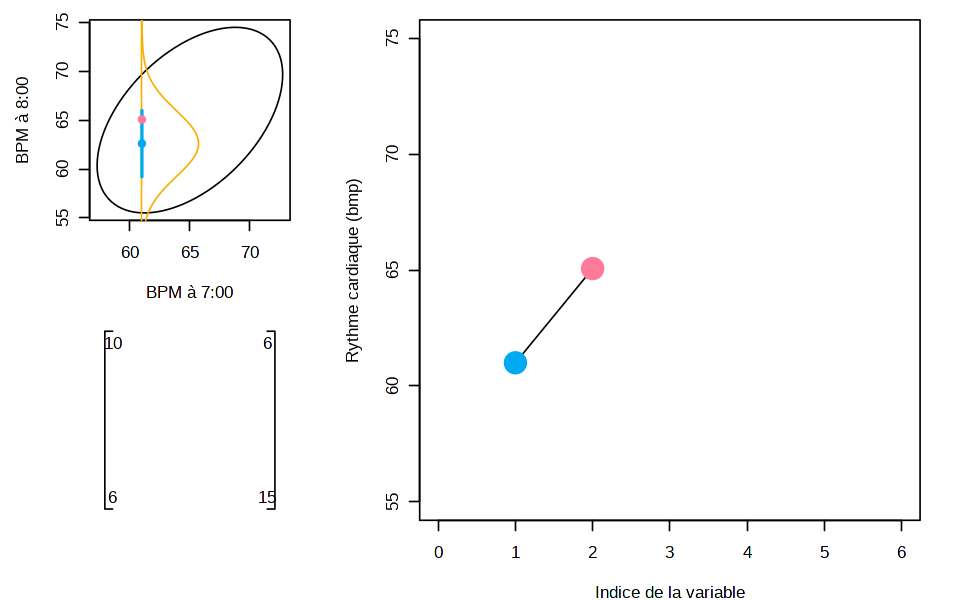

In [5]:
# 1. Distribution
means_vec <- c(65, 65)
covariance_mat <- matrix(c(10, 6, 6, 15), ncol=2)

# 2. Condition
condition_x1 <- 61 # changer ce chiffre pour visualiser l'effet

# 3. Densité conditionnée
cond_parameters <- condMVN(mean=means_vec, sigma=covariance_mat,
                           dependent=2, given=1, X.given=condition_x1)
cond_mean <- cond_parameters$condMean
cond_sd <- sqrt(cond_parameters$condVar)
x2_sequence <- seq(50, 90, length=100)
x2_dens <- dnorm(x2_sequence, mean=cond_mean, sd=cond_sd)
x2_draw <- rnorm(1, cond_mean, cond_sd)

# 4. Graphiques
options(repr.plot.width = 8, repr.plot.height = 5)
layout(matrix(c(1,2,3,3), nrow=2), widths=c(1,2))
par(mar=c(4, 4, 1, 1), pty='s')

## 4.1 Ellipse
plot(ellipse(x=covariance_mat, centre=means_vec, levels=0.95), 
     type='l', xlab="BPM à 7:00", ylab="BPM à 8:00")
abline(v=condition_x1, col='#f8ad00', lwd=1)
lines(x=condition_x1 + x2_dens*40, y=x2_sequence, col="#f8ad00", lwd=1)
lines(x = c(condition_x1, condition_x1),
      y = c(cond_mean-cond_sd, cond_mean+cond_sd),
     lwd=2, col='#00aaf2')
points(condition_x1, cond_mean, 
       col='#00aaf2', pch=16, cex=1)
points(condition_x1, x2_draw, pch=16, col="#ff7998")

## 4.2 Covariance
plot_matrix(covariance_mat)

## 4.3 Série
plot(c(1, 2), c(condition_x1, x2_draw), xlim=c(0, 6), ylim=c(55, 75), type='l',
    xlab="Indice de la variable", ylab="Rythme cardiaque (bmp)")
points(1, condition_x1, pch=16, col='#00aaf2', cex=3)
points(2, x2_draw, pch=16, col='#ff7998', cex=3)

Les valeurs que peuvent prendre le rythme cardiaque en $x_2$ sont tirées aléatoirement d'une distribution conditionnée. Sautons maintenant au cas multinormal, incluant 6 variables (*hexanormal*!). Afin d'éviter de composer une matrice de covariance à la mitaine, je me permets de la générer avec une fonction. Cette fonction particulière est nommée *fonction de base radiale* ou *exponentiel de la racine*.

$$K_{RBF} \left( x_i, x_j \right) = \sigma^2 exp \left( -\frac{\left( x_i - x_j \right)^2}{2 l^2}  \right) $$

In [6]:
RBF_kernel <- function(x, sigma, l) {
    n <- length(x)
    k <- matrix(ncol = n, nrow = n)
    for (i in 1:n) {
        for (j in 1:n) {
            k[i, j] = sigma^2 * exp(-1/(2*l^2) * (x[i] - x[j])^2)
        }
    }
    colnames(k) <- paste0('x', 1:n)
    rownames(k) <- colnames(k)
    return(k)
}

Dans la fonction `RBF_kernel`, `x` désigne les dimensions, `sigma` désigne un écart-type commun à chacune des dimensions et `l` est la longueur désignant l'amplification de la covariance entre des dimensions éloignées (dans le sens que la première dimension est éloignée de la dernière). Pour 6 dimensions, avec un écart-type de 4 et une longueur de 2.

In [7]:
covariance_6 <- RBF_kernel(1:6, sigma=4, l=2)
round(covariance_6, 2)

,x1,x2,x3,x4,x5,x6
x1,16.00,14.12,9.70,5.19,2.17,0.70
x2,14.12,16.00,14.12,9.70,5.19,2.17
x3,9.70,14.12,16.00,14.12,9.70,5.19
x4,5.19,9.70,14.12,16.00,14.12,9.70
x5,2.17,5.19,9.70,14.12,16.00,14.12
x6,0.70,2.17,5.19,9.70,14.12,16.00


Changez la valeur de `l` permet de bien saisir son influence sur la matrice de covariance. Avec un `l` de 1, la covariance entre $x_1$ et $x_6$ est pratiquement nulle: elle est un peut plus élevée avec `l=2`. Pour reprendre l'exemple du rythme cardiaque, on devrait en effet s'attendre à retrouver une plus grande corrélation entre celles mesurées aux temps 4 et 5 qu'entre les temps 1 et 6.

De même que dans la situation où nous avions une distribution binormale, nous pouvons conditionner une distribution multinormale. Dans l'exemple suivant, je conditionne la distribution multinormale de 6 dimensions en spécifiant les valeurs prises par les deux premières dimensions. Le résultat du conditionnement est une distribution en 4 dimensions. Puisqu'il est difficile de présenter une distribution en 6D, le graphique en haut à gauche ne comprend que les dimensions 1 et 6. Remarquez que la corrélation entre les dimensions 1 et 6 est faible, en concordance avec la matrice de covariance générée par la fonction `RBF_kernel`. Lancez plusieurs fois le code et voyez ce qui advient des échantillonnages dans les dimensions 3 à 6 selon le conditionnement en 1 et 2.

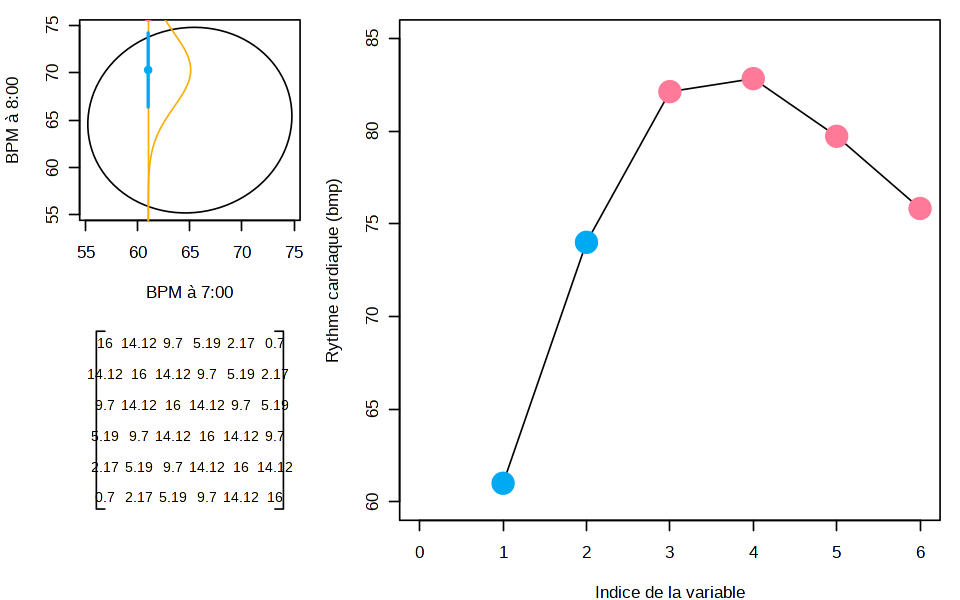

In [8]:
library("MASS")

# 1. Distribution
means_vec <- rep(65, 6)
covariance_mat <- covariance_6

# 2. Condition
conditions_x <- c(61, 74) # changer ces chiffres pour visualiser l'effet

# 3. Densité conditionnée
cond_parameters <- condMVN(mean=means_vec, sigma=covariance_mat, 
        dependent.ind = 3:6, given.ind=1:2,
        X.given=conditions_x)
cond_mean <- cond_parameters$condMean
cond_sd <- sqrt(cond_parameters$condVar)
x6_sequence <- seq(50, 90, length=100)
x6_dens <- dnorm(x2_sequence, mean=cond_mean[4], sd=cond_sd[4, 4])

x_3.6_draw <- mvrnorm(n = 1, mu = cond_mean, Sigma = cond_sd^2)

# 4. Graphiques
options(repr.plot.width = 8, repr.plot.height = 5)
layout(matrix(c(1,2,3,3), nrow=2), widths=c(1,2))
par(mar=c(4, 4, 1, 1))

## 4.1 Ellipse
plot(ellipse(x=covariance_mat[c(1, 6), c(1, 6)], centre=means_vec[c(1, 6)], levels=0.95), 
     type='l', xlab="BPM à 7:00", ylab="BPM à 8:00")
abline(v=conditions_x[1], col='#f8ad00', lwd=1)
lines(x=condition_x1 + x6_dens*40, y=x2_sequence, col="#f8ad00", lwd=1)
lines(x = c(conditions_x[1], conditions_x[1]),
      y = c(cond_mean[4]-cond_sd[4, 4], cond_mean[4]+cond_sd[4, 4]),
     lwd=2, col='#00aaf2')
points(conditions_x[1], cond_mean[4],
       col='#00aaf2', pch=16, cex=1)
points(conditions_x[1], x_3.6_draw[4], pch=16, col="#ff7998")

## 4.2 Covariance
plot_matrix(covariance_mat, cex=0.8)

## 4.3 Série
plot(1:6, c(conditions_x, x_3.6_draw), xlim=c(0, 6), ylim=c(60, 85), type='l',
    xlab="Indice de la variable", ylab="Rythme cardiaque (bmp)")
points(c(1, 2), conditions_x, pch=16, col='#00aaf2', cex=3)
points(3:6, x_3.6_draw, pch=16, col='#ff7998', cex=3)

La structure de la covariance assure que les dimensions proches prennent des valeurs similaires, assurant une courbe lisse et non en dents de scie. Pourquoi s'arrêter à 6 dimensions? Prenons-en plusieurs.

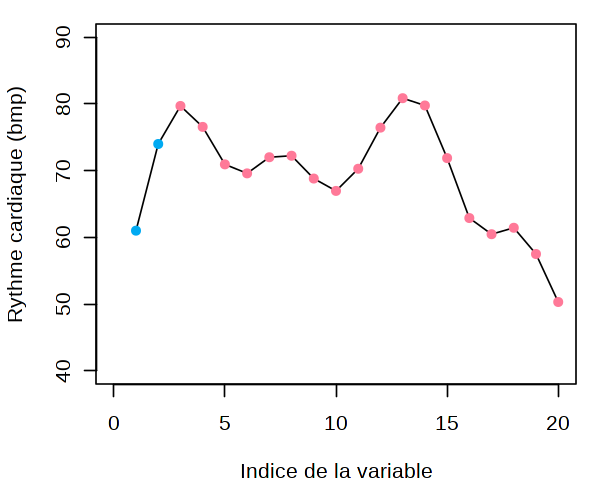

In [9]:
# 1. Distribution
n <- 20
means_vec <- rep(65, n)
covariance_mat <- RBF_kernel(x = 1:n, sigma = 10, l = 2)

# 2. Condition
conditions_x <- c(61, 74) # changer ces chiffres pour visualiser l'effet

# 3. Densité conditionnée
cond_parameters <- condMVN(mean=means_vec, sigma=covariance_mat, 
        dependent.ind = 3:n, given.ind=1:2,
        X.given=conditions_x)
cond_mean <- cond_parameters$condMean
cond_sd <- cond_parameters$condVar
x_3.n_draw <- mvrnorm(n = 1, mu = cond_mean, Sigma = cond_sd)

# 4. Graphiques
options(repr.plot.width = 5, repr.plot.height = 4)
par(mar=c(4, 4, 1, 1))

## 4.3 Série
plot(1:n, c(conditions_x, x_3.n_draw), xlim=c(0, n), ylim=c(40, 90), type='l',
    xlab="Indice de la variable", ylab="Rythme cardiaque (bmp)")
points(c(1, 2), conditions_x, pch=16, col='#00aaf2', cex=1)
points(3:n, x_3.n_draw, pch=16, col='#ff7998', cex=1)

On pourrait calculer analytiquement la distribution des points qui suivent les deux points conditionnés. Mias lançons plutôt des simulations.

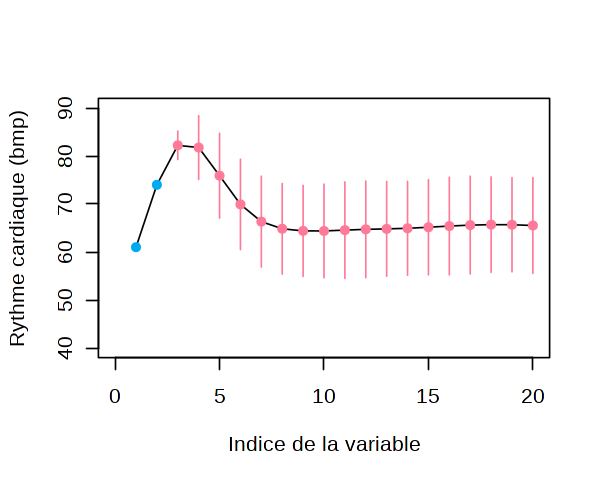

In [10]:
x_3.n_draw <- mvrnorm(n = 1000, mu = cond_mean, Sigma = cond_sd)
means_draw <- apply(x_3.n_draw, 2, mean)
sd_draw <- apply(x_3.n_draw, 2, sd)

plot(1:n, c(conditions_x, means_draw), xlim=c(0, n), ylim=c(40, 90), type='l',
    xlab="Indice de la variable", ylab="Rythme cardiaque (bmp)")
points(c(1, 2), conditions_x, pch=16, col='#00aaf2', cex=1)
points(3:n, means_draw, pch=16, col='#ff7998', cex=1)
for (i in 1:(n-2)) {
    lines(c(i+2, i+2), c(means_draw[i] - sd_draw[i], 
                         means_draw[i] + sd_draw[i]),
         col = "#ff7998")
}

Revenons au rythme cardiaque. On pourra utiliser le conditionnement aux temps observés, soit 7:00, 8:00, 10:00, 14:00 et 17:00 pour estimer la distribution à 12:00 et 16:00, où à des dimensions artificielles quelconques ici fixées aux demi-heures.

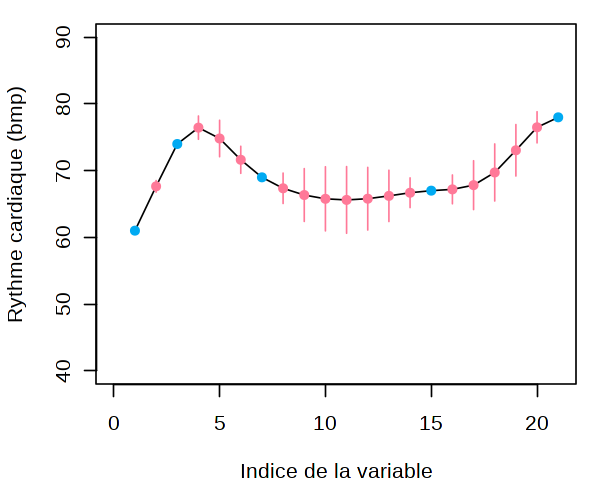

In [11]:
# 1. Distribution
n <- 21
means_vec <- rep(65, n)
covariance_mat <- RBF_kernel(x = 1:n, sigma = 5, l = 2)

# 2. Condition
conditions_x <- c(61, 74, 69, 67, 78)
conditions_indices <- c(1, 3, 7, 15, 21)
dependent_indices <- (1:20)[! 1:20 %in% conditions_indices]

# 3. Densité conditionnée
cond_parameters <- condMVN(mean=means_vec, sigma=covariance_mat, 
                           dependent.ind = dependent_indices,
                           given.ind=conditions_indices,
                           X.given=conditions_x)
cond_mean <- cond_parameters$condMean
cond_sd <- cond_parameters$condVar
x_draw <- mvrnorm(n = 500, mu = cond_mean, Sigma = cond_sd)
means_draw <- apply(x_draw, 2, mean)
sd_draw <- apply(x_draw, 2, sd)

# 4. Graphiques
options(repr.plot.width = 5, repr.plot.height = 4)
par(mar=c(4, 4, 1, 1))

bpm <- rep(NA, n)
bpm[conditions_indices] <- conditions_x
bpm[dependent_indices] <- means_draw


## 4.3 Série
plot(1:n, bpm, xlim=c(0, n), ylim=c(40, 90), type='l',
    xlab="Indice de la variable", ylab="Rythme cardiaque (bmp)")
points(conditions_indices, bpm[conditions_indices], pch=16, col='#00aaf2', cex=1)
points(dependent_indices, bpm[dependent_indices], pch=16, col='#ff7998', cex=1)

for (i in 1:length(sd_draw)) {
    lines(c(dependent_indices[i], dependent_indices[i]),
          c(means_draw[i] - sd_draw[i], 
            means_draw[i] + sd_draw[i]),
         col = "#ff7998")
}

Comme on devrait s'y attendre, la régression résultant de la mise en indices de la distribution est précise aux mesures, et imprécise aux indices peu garnies en mesures. Nous avions utilisé 21 dimensions. **Lorsque l'on généralise la procédure à une quantité infinie de dimensions, on obtient un *processus gaussien*.** 

![](https://media.giphy.com/media/12R2bKfxceemNq/giphy.gif)

L'indice de la variable devient ainsi une valeur réelle. Un processus gaussien, $\mathcal{GP}$, est défini par une fonction de la moyenne, $m \left( x \right)$, et une autre de la covariance que l'on nomme *noyau* (ou *kernel*), $K \left( x, x' \right)$. Un processus gaussien est noté de la manière suivante:

$$\mathcal{GP} \sim \left( m \left( x \right), K \left( x, x' \right) \right)$$

La fonction définissant la moyenne peut être facilement écartée en s'assurant de normaliser la variable réponse. Par convention, on spécifie une fonction de moyenne comme retournant toujours un zéro. Quant au noyau, il peut prendre différentes formes. De plus ces formes peuvent être combinées. Règle générale, on utilisera un noyau permettant de définir deux paramètres: la hauteur ($\sigma$) et la longueur de l'ondulation ($l$).

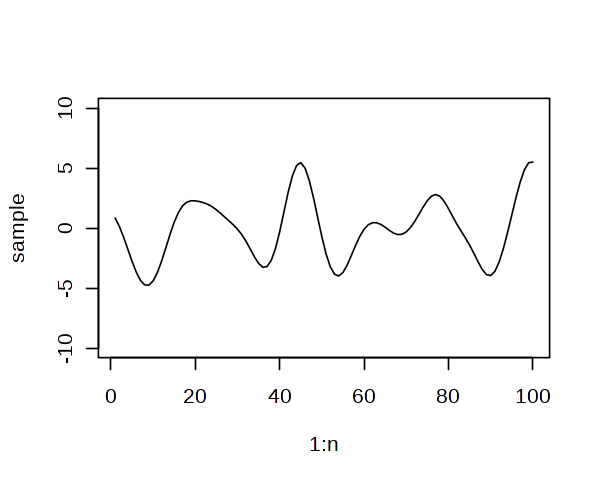

In [12]:
# Faites varier ces paramètres
SIGMA <- 3
L <- 5

# Graphique
n <- 100
sample <- mvrnorm(n = 1, mu = rep(0, n), 
                  Sigma = RBF_kernel(x=1:n, sigma = SIGMA, l = L))
plot(1:n, sample, type='l', ylim=c(-10, 10))

On pourra ajouter à ce noyau un bruit blanc, c'est-à-dire une variation purement aléatoire, sans covariance (noyau générant une matrice diagonale).

Le noyau devient ainsi un *a priori*, et le processus gaussien conditionné aux données devient un *a posteriori* probabiliste.

Finalement, les processus gaussiens peuvent être extrapolés à plusieurs variables descriptives.

### Les processus gaussiens en `R`

Pas de souci, vous n'aurez pas à programmer vos propres fonctions pour lancer des processus gaussiens. Vous pourrez [passer par `caret`](https://topepo.github.io/caret/train-models-by-tag.html#gaussian-process). Vous pourriez, comme c'est le cas avec les réseaux neuronnaux, obtenir davantage de contrôle sur l'autoapprentissage en utilisant directement la fonction `gp` du package [`gpe`](https://github.com/goldingn/gpe). Mais ce module n'est pas tout à fait au point. Il reste utile pour se familiariser avec les processus gaussiens.

In [19]:
library("gpe")
x <- c(7, 8, 10, 14, 17)
y <- c(61, 74, 69, 67, 78)
y_sc <- (y - mean(y)) / sd(y)

In [20]:
m <- gp(y ~ rbf('x', sigma = 1, l = 1), data = data.frame(x, y = y_sc), 
        family = gaussian)

In [21]:
x_seq <- seq(min(x), max(x), length = 500)
pred_df <- data.frame(x = x_seq)
y_sc_pred <- predict(m, pred_df, type = 'response', sd = TRUE)
y_pred_m <- y_sc_pred$fit * sd(y) + mean(y)
y_pred_sd <- y_sc_pred$sd * sd(y)

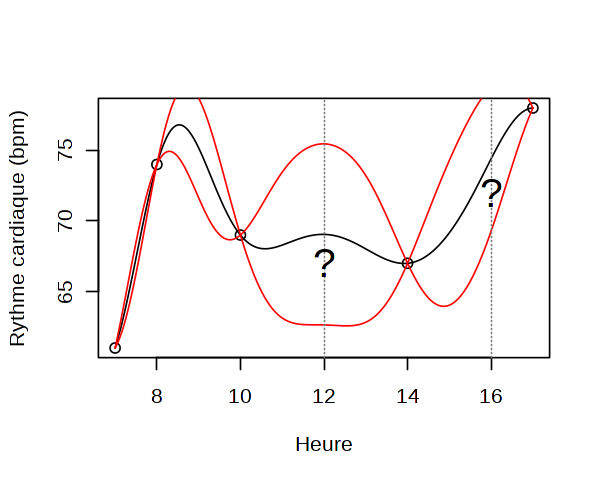

In [22]:
plot(x, y, xlab="Heure", ylab="Rythme cardiaque (bpm)")

lines(x_seq, y_pred_m)
lines(x_seq,  y_pred_m + y_pred_sd, col="red")
lines(x_seq,  y_pred_m - y_pred_sd, col="red")

abline(v=12, lty=3, col='gray50');text(12, 67, '?', cex=2) # 😎
abline(v=16, lty=3, col='gray50');text(16, 72, '?', cex=2) # 😎

### Application pratique

Les processus gaussiens sont utiles pour effectuer des prédictions sur des phénomène sur lesquels on désire éviter de se commettre sur la structure. Les séries temporelles ou les signaux spectraux en sont des exemples. Aussi, j'ai utilisé les processus gaussiens pour modéliser des courbes de réponse aux fertilisants.

EXEMPLE...

Prédiction spatiale:
- https://www.sciencedirect.com/science/article/pii/S2211675316300033
- https://stackoverflow.com/questions/43618633/multi-output-spatial-statistics-with-gaussian-processes
